# Exploratory Data Analysis

# 4. EDA on Transactions Data

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

print('imported library')

imported library


In [10]:
# reading dataset

url = '..\favorita-grocery-sales-forecasting'

transactions = pd.read_csv(os.path.join(url,"transactions.csv") , parse_dates = ['date'] )

stores = pd.read_csv(os.path.join(url,"stores.csv"))


** dataset loaded **


In [11]:
transactions.head()
# stores.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [12]:
transactions.dtypes

date            datetime64[ns]
store_nbr                int64
transactions             int64
dtype: object

In [13]:
# Checking Missing Values

transactions.isnull().values.any()  # False

transactions.isnull().any()  


date            False
store_nbr       False
transactions    False
dtype: bool

# No. of transactions per Month for Every Year :

In [14]:
#Adding year , month and day of week as features

transactions["year"]        = transactions["date"].dt.year
transactions["month"]       = transactions["date"].dt.month
transactions['day_of_week'] = transactions['date'].dt.day_name()


# transactions["year"] = transactions["year"].astype(str)
transactions.head()

,date,store_nbr,transactions,year,month,day_of_week
0,2013-01-01,25,770,2013,1,Tuesday
1,2013-01-02,1,2111,2013,1,Wednesday
2,2013-01-02,2,2358,2013,1,Wednesday
3,2013-01-02,3,3487,2013,1,Wednesday
4,2013-01-02,4,1922,2013,1,Wednesday


In [15]:
# مجموع تراکنشهای یکسال

transactions.year.value_counts().to_frame()

# transactions.year.unique()  # [2013, 2014, 2015, 2016, 2017]


,year
2016,18999
2015,18346
2014,17138
2013,16908
2017,12097


In [16]:
x = transactions.groupby(['month', 'year'], as_index=False).agg({'transactions':'sum'})
x.head(10)

,month,year,transactions
0,1,2013,2289558
1,1,2014,2393528
2,1,2015,2489059
3,1,2016,2371205
4,1,2017,2612848
5,2,2013,2169615
6,2,2014,2278167
7,2,2015,2345984
8,2,2016,2465798
9,2,2017,2448370


In [17]:
y = x.pivot("month", "year", "transactions")
y

year,2013,2014,2015,2016,2017
month,,,,,
1,2289558.0,2393528.0,2489059.0,2371205.0,2612848.0
2,2169615.0,2278167.0,2345984.0,2465798.0,2448370.0
3,2458683.0,2545427.0,2625500.0,2607658.0,2680645.0
4,2344905.0,2455666.0,2533355.0,2631797.0,2667808.0
5,2467465.0,2503262.0,2673911.0,2666157.0,2801884.0
6,2392206.0,2399144.0,2530903.0,2491063.0,2668863.0
7,2401968.0,2442341.0,2604784.0,2594087.0,2784026.0
8,2461139.0,2537572.0,2675057.0,2536111.0,1335692.0
9,2380462.0,2449131.0,2545252.0,2436974.0,NaN


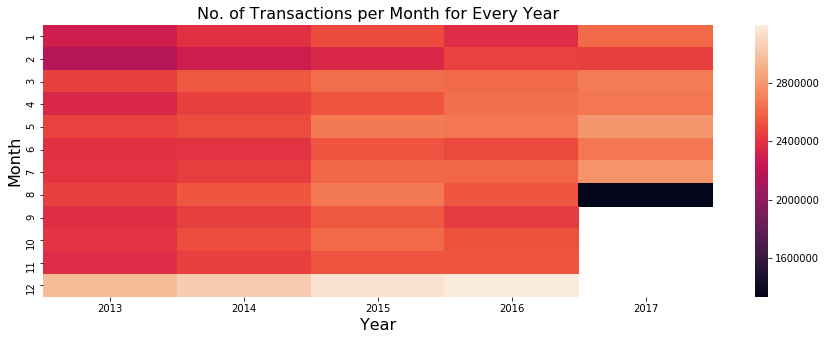

In [18]:
plt.figure(figsize=(15,5))
sns.heatmap(y)
plt.xlabel('Year', fontsize= 16)
plt.ylabel('Month', fontsize= 16)
plt.title("No. of Transactions per Month for Every Year",fontsize= 16)
plt.show()

- December has the most transactions for all years

- With passing years, the squares are getting lighter, which indicates that the no. of transactions are increasing each year.

# No. of transactions per Day of Week for Every Year

In [19]:
x = transactions.groupby(['day_of_week', 'year'], as_index=False).agg({'transactions':'sum'})
x.head(10)

,day_of_week,year,transactions
0,Friday,2013,3998777
1,Friday,2014,4152886
2,Friday,2015,4259980
3,Friday,2016,4461435
4,Friday,2017,2807740
5,Monday,2013,4072431
6,Monday,2014,4177605
7,Monday,2015,4312116
8,Monday,2016,4188122
9,Monday,2017,2809351


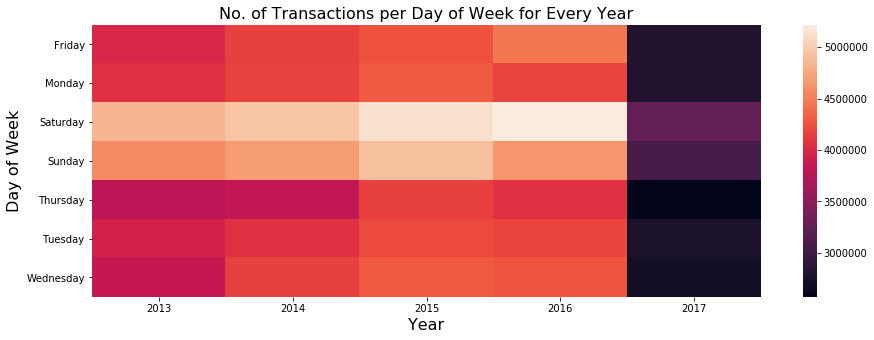

In [20]:
y = x.pivot("day_of_week", "year", "transactions")
plt.figure(figsize=(15,5))
sns.heatmap(y)
plt.xlabel('Year', fontsize= 16)
plt.ylabel('Day of Week', fontsize= 16)
plt.title("No. of Transactions per Day of Week for Every Year",fontsize= 16)
plt.show()

- Saturday has the maximum no. of transactions followed by Saturday 
           (i.e. Weekends seem to be prefered as compared to Weekdays to shop at this supermaket.)

- Saturday has more transactions than Sunday, But Sunday has higher sales than Saturday 
           which means customers return products on Saturday.

# No. of transactions per Store :

In [21]:
x = transactions.groupby(['store_nbr'], as_index=False).agg({'transactions':'sum'})
x.head(10)

,store_nbr,transactions
0,1,2553963
1,2,3219901
2,3,5366350
3,4,2519007
4,5,2347877
5,6,3065896
6,7,2995993
7,8,4637971
8,9,3516162
9,10,1652493


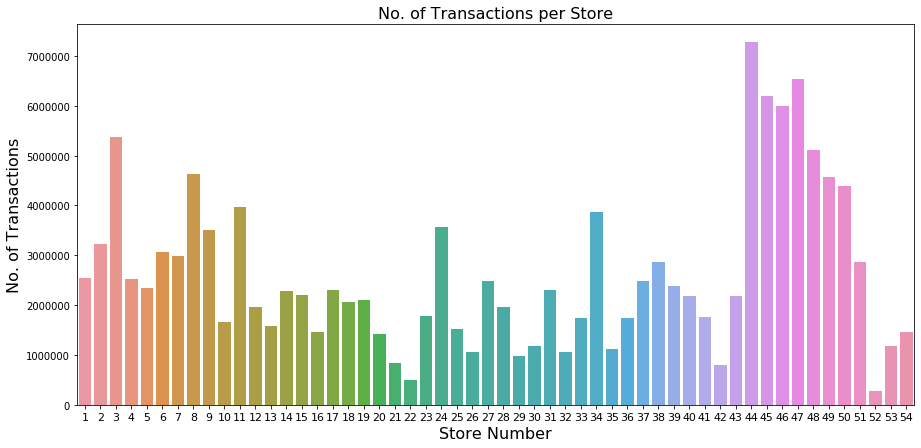

In [22]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x = x.store_nbr, y= x.transactions)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 11)
plt.title('No. of Transactions per Store',fontsize= 16)
plt.ylabel('No. of Transactions', fontsize= 16)
plt.xlabel('Store Number', fontsize= 16)
plt.show()

- Store No. 44 has the maximum no. of transactions.
- Store No. 52 has the minimum no. of transactions.

In [23]:
x = transactions.groupby(['store_nbr', 'year'], as_index=False).agg({'transactions':'sum'})
x.head(10)

,store_nbr,year,transactions
0,1,2013,552779
1,1,2014,558324
2,1,2015,558606
3,1,2016,544262
4,1,2017,339992
5,2,2013,687904
6,2,2014,711493
7,2,2015,708200
8,2,2016,690682
9,2,2017,421622


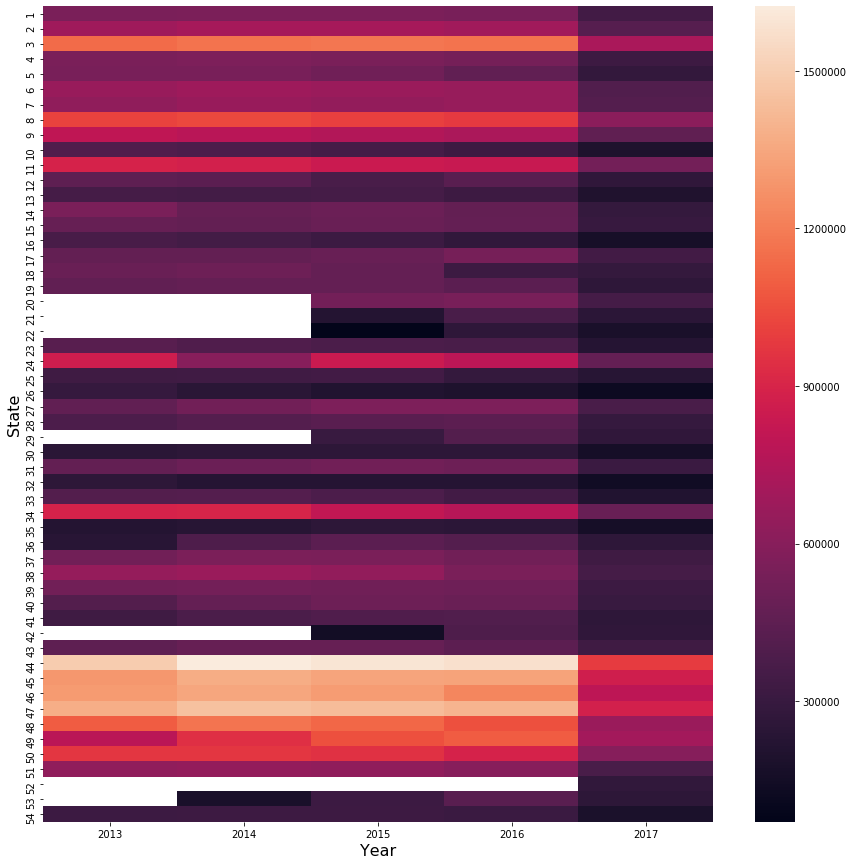

In [24]:
y = x.pivot("store_nbr", "year", "transactions")
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(y)
plt.xlabel('Year', fontsize= 16)
plt.ylabel('State', fontsize= 16)
plt.show()

- White boxes for store no. 20, 21, 22, 42 etc. shows that the particular store was not opened in that particular year
(as there are no transactions).


- New Stores are opened yearly 
(for ex. store no. 42 was opened in year 2015 and store no. 53 was opened in year 2017 )

# No. of Transactions per State for Every Year :

# Merging transactions df & stores df

In [25]:
df_transactions_store = pd.merge(transactions , stores, on='store_nbr')
df_transactions_store.head()

,date,store_nbr,transactions,year,month,day_of_week,city,state,type,cluster
0,2013-01-01,25,770,2013,1,Tuesday,Salinas,Santa Elena,D,1
1,2013-01-02,25,1038,2013,1,Wednesday,Salinas,Santa Elena,D,1
2,2013-01-03,25,887,2013,1,Thursday,Salinas,Santa Elena,D,1
3,2013-01-04,25,1054,2013,1,Friday,Salinas,Santa Elena,D,1
4,2013-01-05,25,1355,2013,1,Saturday,Salinas,Santa Elena,D,1


In [28]:
x = df_transactions_store.groupby(['state', 'year'], as_index=False).agg({'transactions':'sum'})
x.head(10)

,state,year,transactions
0,Azuay,2013,1042074
1,Azuay,2014,1087489
2,Azuay,2015,1210466
3,Azuay,2016,1420972
4,Azuay,2017,912846
5,Bolivar,2013,460402
6,Bolivar,2014,473197
7,Bolivar,2015,474350
8,Bolivar,2016,437159
9,Bolivar,2017,262381


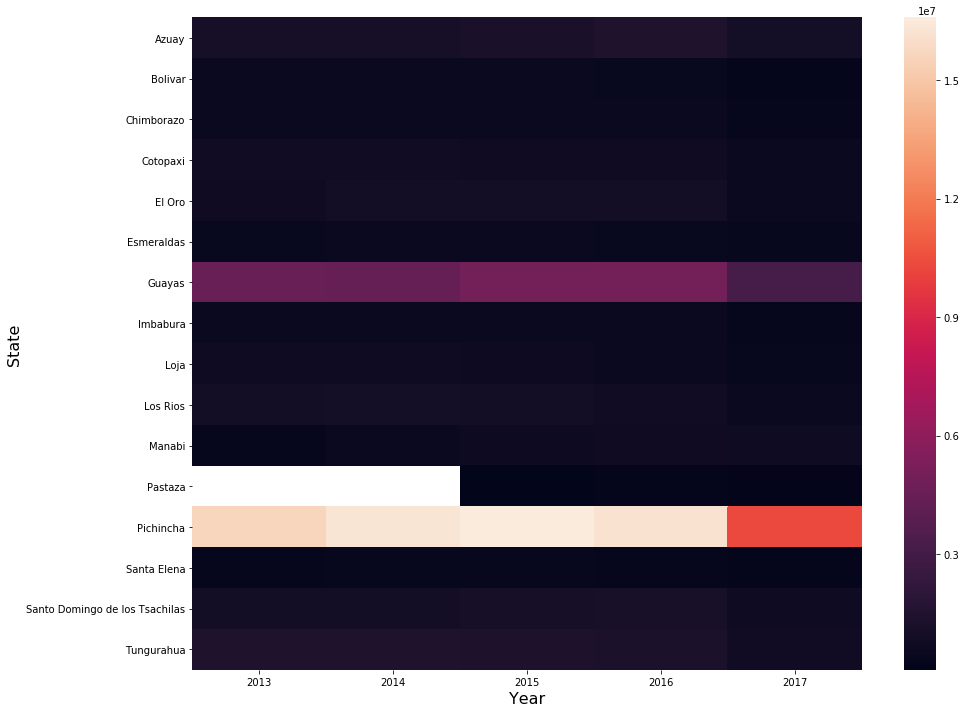

In [29]:
y = x.pivot("state", "year", "transactions")
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(y)
plt.xlabel('Year', fontsize= 16)
plt.ylabel('State', fontsize= 16)
plt.show()


- Pichincha State has maximum no. of transactions for all years followed by Guayas.


- Pastaza State did not have any stores in year 2013 and 2014